<a href="https://colab.research.google.com/github/joelitonmiotto/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_da_Cidade_de_Paris_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**ANÁLISE DOS DADOS DO AIRBNB NA CIDADE DE PARIS**
---
---
O Airbnb é a maior rede de hotéis do mundo que não possui nenhum quarto de hotel. É uma empresa que faz parte de um grupo de startups que tem transformado o segmento de viagens e turismo nos últimos anos.

Conectando pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Por meio do portal Inside Airbnb (Disponível em: http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*. Uma de suas iniciativas, é disponibilizar dados do site para algumas das principais cidades do mundo.

<center><img alt="Analisando Airbnb" width="5%" src="https://logodownload.org/wp-content/uploads/2016/10/Airbnb-Logo-9.png"></center>



1.1 OBTENÇÃO DOS DADOS
-----------------------------------------

A obtenção dos dados teve como objetivo analisar informações referentes à cidade de Paris, capital da França, com vistas a observar quais insights podem ser extraídos a partir destes dados brutos.

Importante destacar que todos os dados obtidos foram extraídos  no site da Inside Airbnb disponível em <Inside Airbnb ( http://insideairbnb.com/get-the-data.html )> a partir do segunte arquivo: listings.csv -*Summary information and metrics for listings in Paris (good for visualisations).*




In [0]:
# Importação dos pacotes que serão utilizados nesta análise.

# A biblioteca pandas nos fornece as ferramentas para facilitar a manipulação dos dados.
import pandas as pd
# matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays.
import matplotlib.pyplot as plt
# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib
import seaborn as sns
#A linha %matplotlib inline diz ao Jupyter que queremos mostrar os gráficos da Matplotlib no próprio notebook.
%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2019-11-07/visualisations/listings.csv")

In [3]:
# Podemos, através do comando "df.columns" visualizar uma lista com o nome de cada coluna existente no nosso conjunto de dados.

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Através do comando "df.shape", conseguirmos ver a dimensão do nosso conjunto de dados.

In [4]:
# retorna a quantidade de colunas e linhas.
df.shape

(65493, 16)

Ou seja, o nosso conjunto de dados contém possui 65493 linhas e  16 colunas.



## **1.2 ANÁLISE DOS DADOS**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**



* `id` - *Número de id gerado para identificar o imóvel;*

* `name` - *Nome da propriedade anunciada;*

* `host_id` - *Número de id do proprietário (anfitrião) da propriedade;*

* `host_name` - *Nome do anfitrião;*

* `neighbourhood_group` - *Esta coluna não contém nenhum valor válido;*

* `neighbourhood` - *Nome do bairro;*

* `latitude` - *Coordenada da latitude da propriedade;*

* `longitude` - *Coordenada da longitude da propriedade;*

* `room_type` - *Informa o tipo de quarto que é oferecido;*

* `price` - *Preço para alugar o imóvel;*

* `minimum_nights` - *Quantidade mínima de noites para reservar;*

* `number_of_reviews` - *Número de reviews que a propriedade possui;*

* `last_review` - *Data do último review;*

* `reviews_per_month` - *Quantidade de reviews por mês;*

* `calculated_host_listings_count` - *Quantidade de imóveis do mesmo anfitrião;*

* `availability_365` - *Número de dias de disponibilidade dentro de 365 dias.*


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# O head() mostra as 5 primeiras linhas do DataFrame.

df.head()

# Podemos observar que a coluna  (neighbourhood_group) não contém informações listadas.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,33065009,Beautiful apartment center of Paris with terrace,28313443,Michael & Johanna,NaN,Bourse,48.86847,2.35209,Entire home/apt,256,2,29,2019-11-03,4.12,73,284
1,33008241,Magnificent apt located in the heart of Paris,248419822,Mickael,NaN,Temple,48.86512,2.35333,Entire home/apt,85,1,15,2019-11-01,2.18,1,5
2,39024702,Cosy flat 4P- 3e - Grands Boulevards,115296025,Lucas & Mathilde,NaN,Bourse,48.86914,2.34817,Entire home/apt,88,1,0,NaN,NaN,22,341
3,38382924,Cosy apartment in Montmartre,24650806,Sarah,NaN,Buttes-Montmartre,48.88619,2.33730,Entire home/apt,92,2,0,NaN,NaN,1,31
4,29010030,"Apartment in Pigalle, Paris",86758450,Laura,NaN,Buttes-Montmartre,48.88314,2.33878,Entire home/apt,85,2,4,2019-04-17,0.30,1,312


---

### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv . Há uma versão mais completa com 66.414 entradas e 106 variáveis ('listings.csv.gz' ).

In [6]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 65493
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [7]:
# Inicialmente, podemos checar se existem células nulas no nosso banco de dados, ou seja, se há células vazias. 
#Isso pode ser feito através do comando "df.isnull()".

df.isnull().head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Contudo, é mais interessante sabermos o total de células vazias em cada coluna do nosso dataset. 
#Para isso, utilizamos o comando anterior "df.isnull()" e acrescentamos outro comando para executar a soma. Assim, temos: "df.isnull().sum()".

df.isnull().sum()

id                                    0
name                                 67
host_id                               0
host_name                            69
neighbourhood_group               65493
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12891
reviews_per_month                 12891
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Em seguida, podemos analisar a porcentagem de células vazias no nosso dataset atribuindo o seguinte comando.

((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))*100

neighbourhood_group               100.000000
reviews_per_month                  19.683020
last_review                        19.683020
host_name                           0.105355
name                                0.102301
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` quase 20% dos seus valores nulos.
* As variáveis `name` e `host_name` têm aproximadamente  0,105% e 0,102% dos valores nulos, respectivamente.

### **3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

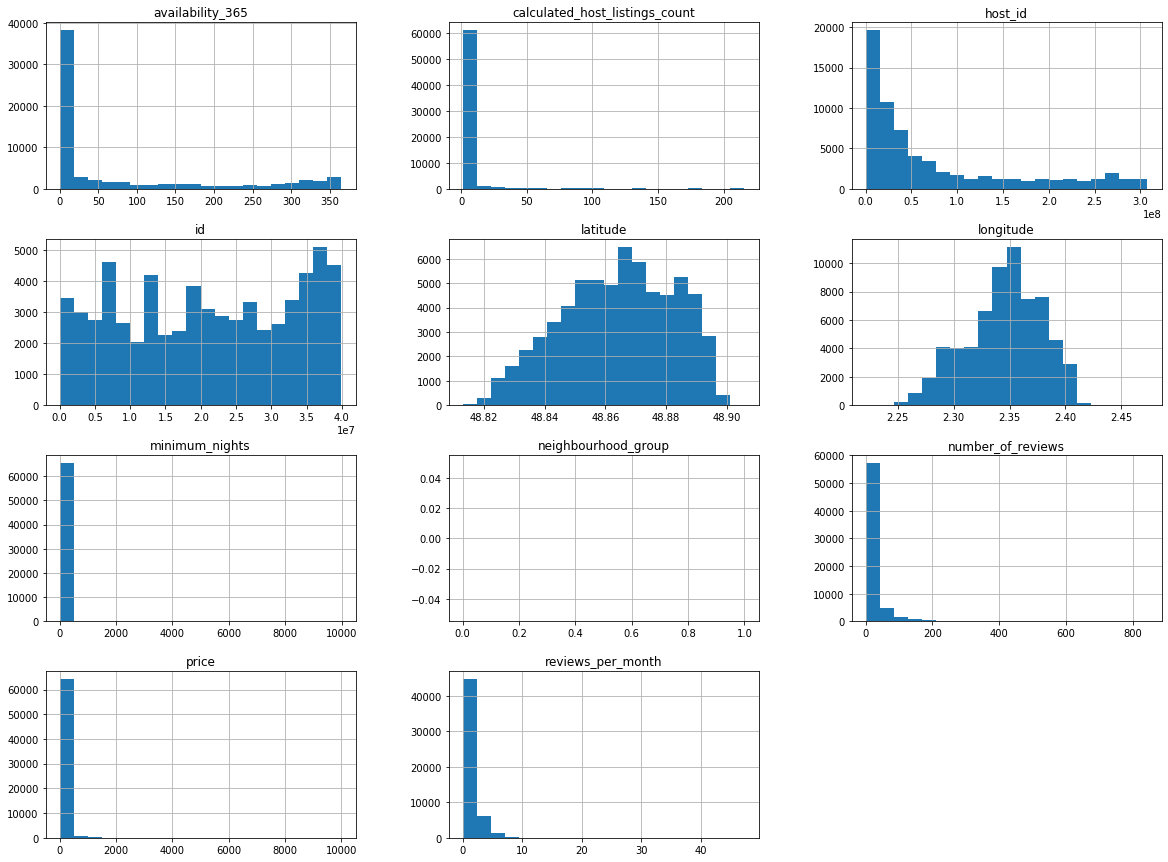

In [10]:
# Plotar o histograma das variáveis numéricas

df.hist(bins=20, figsize=(20,15));

### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [11]:
# O describe calcula estatísticas para cada coluna numérica do DataFrame, como contagem , soma, média, mediana, etc.
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65493.000000,65493.000000,65493.000000,52602.000000,65493.000000,65493.000000
mean,121.597957,5.232926,20.007497,1.204227,5.779045,80.306521
std,225.741393,44.114105,40.668748,1.449854,22.193633,120.730193
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.240000,1.000000,0.000000
50%,84.000000,2.000000,6.000000,0.710000,1.000000,3.000000
75%,120.000000,4.000000,20.000000,1.640000,1.000000,133.000000
max,10000.000000,9999.000000,844.000000,47.380000,216.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 120, porém seu valor máximo é  10000.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights


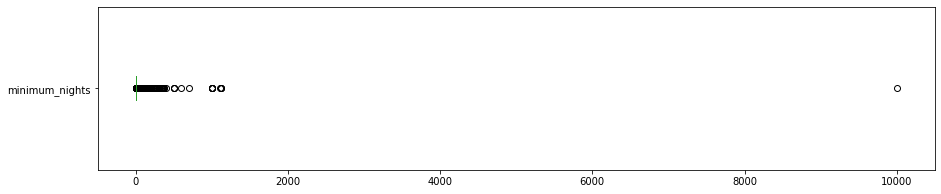

minimum_nights: valores acima de 30:
824 entradas
1.2581%


In [12]:
# minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

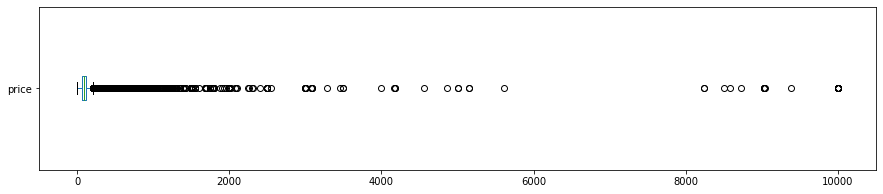


price: valores acima de 1500
99 entradas
0.1512%


In [13]:
# price

df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

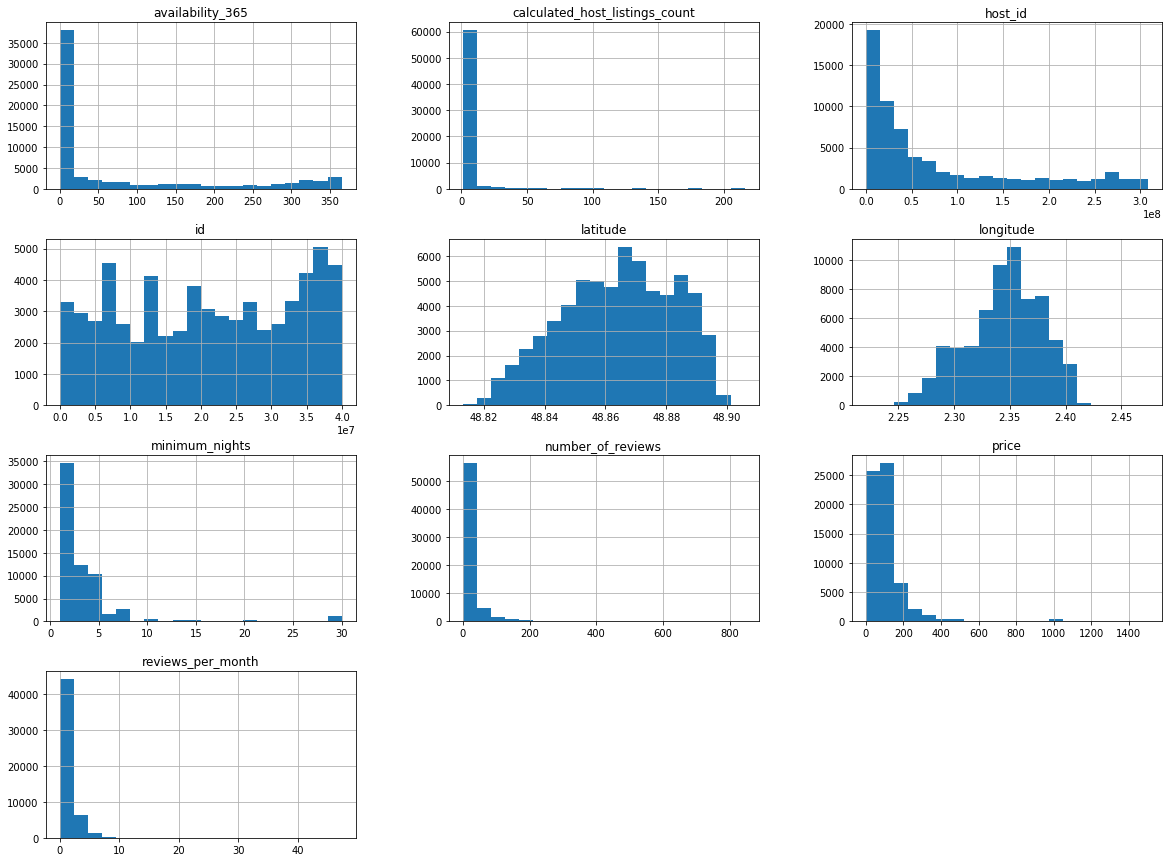

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,15));

É fundamental fazermos a identificação de *outilers* dentro do nosso conjunto de dados, uma vez que eles interferem diretamente na nossa análise estatística. Identificar corretamente e eliminar os *outilers*, nos permite melhorar as inferências feitas a partir daqueles dados, obtendo os resultados de maneira mais exata.

### **5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.010849,-0.008444,0.020598,0.217318,0.301103
minimum_nights,-0.010849,1.000000,-0.033471,-0.138028,0.119431,0.101722
number_of_reviews,-0.008444,-0.033471,1.000000,0.522409,-0.023982,0.226131
reviews_per_month,0.020598,-0.138028,0.522409,1.000000,0.026483,0.236912
calculated_host_listings_count,0.217318,0.119431,-0.023982,0.026483,1.000000,0.215655
availability_365,0.301103,0.101722,0.226131,0.236912,0.215655,1.000000


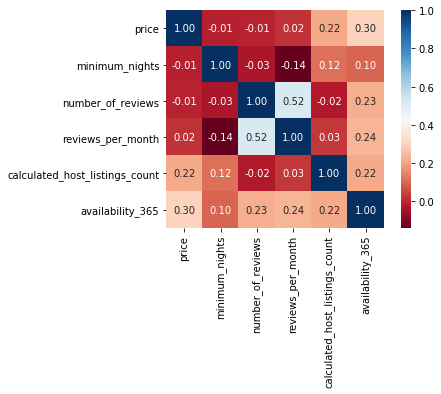

In [16]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Contamos a quantidade de ocorrências de cada tipo de aluguel usando o método value_counts().

In [17]:
# Mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    55596
Private room        6867
Hotel room          1683
Shared room          429
Name: room_type, dtype: int64

In [18]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) 

Entire home/apt    0.860952
Private room       0.106341
Hotel room         0.026063
Shared room        0.006643
Name: room_type, dtype: float64

Portanto, dentre os imóveis para alugar são, aproximadamente:
* 86% casas ou apartamentos inteiros
* 11% quartos individuais
* 3% quartos de hotéis
* 1% quartos compartilhados

### **7. Qual a localidade mais cara de Paris?**


Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            227.120275
Palais-Bourbon    184.206682
Louvre            176.445988
Luxembourg        176.131286
Passy             159.547033
Hôtel-de-Ville    156.517924
Temple            147.447473
Bourse            144.630286
Opéra             135.901607
Panthéon          131.118605
Name: price, dtype: float64

Desta forma, podemos verifica-se que as duas localidades mais caras em Paris são, respectivamente:

**Élysée** - A região fica próxima das grandes atrações turística da cidade, como o Arco do Triunfo, o Rio Sena, Torre Eiffel, os seus cinemas, cafés e algumas das lojas mais luxuosas do mundo.


**Palais-Bourbon** - uma das atrações mais conhecidas é o Palácio Bourbon mandado construir por membros da "*Família Bourbon*" e que atualmente abriga a Assembleia Nacional da França.



**Podemos ainda extrair informações referentes a cada localidade individualmente. Por exemplo, conseguimos ver a quantidade de imóveis disponíveis na região de Panthéon, destacada por ser a que possui os imóveis com os menores preços em Paris.**

In [20]:
# Ver a quantidade de imóveis no Panthéon 
print(df[df.neighbourhood == "Panthéon "].shape)

# Ver todas as entradas   Panthéon 
df[df.neighbourhood == "Panthéon"]

(0, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
295,23469727,Trendy Studio and Big Terrace in the Central P...,14397234,Valeria,NaN,Panthéon,48.84800,2.35476,Entire home/apt,79,4,18,2019-10-07,0.97,1,329
329,13582221,Appartement 3 pièces très calme dans le centre,10807732,Jean-Louis,NaN,Panthéon,48.83987,2.36046,Entire home/apt,160,3,20,2019-10-04,0.54,1,54
6806,21375927,Paris 5 - Censier - Rue Mouffetard,30921940,Damien,NaN,Panthéon,48.84045,2.34838,Entire home/apt,130,3,8,2019-05-03,0.41,1,0
6812,19714288,"Bel appartement, au cœur du quartier latin.",8640908,Guillaume,NaN,Panthéon,48.85172,2.34437,Entire home/apt,90,4,78,2019-10-26,2.78,1,271
6959,23392408,Appartement privé à côté de Notre-Dame,36871762,Nicolas,NaN,Panthéon,48.85138,2.34997,Entire home/apt,45,5,3,2018-04-24,0.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65228,32808957,PARIS CENTRE - LUXEMBOURG - ROOM FOR 2 :),1263570,Tatyana,NaN,Panthéon,48.84298,2.34199,Private room,115,2,0,NaN,NaN,2,0
65317,25218466,St Severin / 2 pièces,44818356,NaN,NaN,Panthéon,48.85173,2.34514,Entire home/apt,80,7,1,2018-07-21,0.06,1,0
65329,24458376,Havre de verdure à port royal,184637882,Arnaud,NaN,Panthéon,48.83864,2.34352,Entire home/apt,70,7,0,NaN,NaN,1,0
65351,20085816,beautiful studio in the 5th,56153070,Benedicte,NaN,Panthéon,48.84123,2.35469,Entire home/apt,39,1,1,2017-07-30,0.04,1,0


**Assim, conseguimos descobrir que na região de Panthéon, são ofertados 2185 locais para locação, além de visualizarmos os nomes dos donos dos imóveis e a localização exata.**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

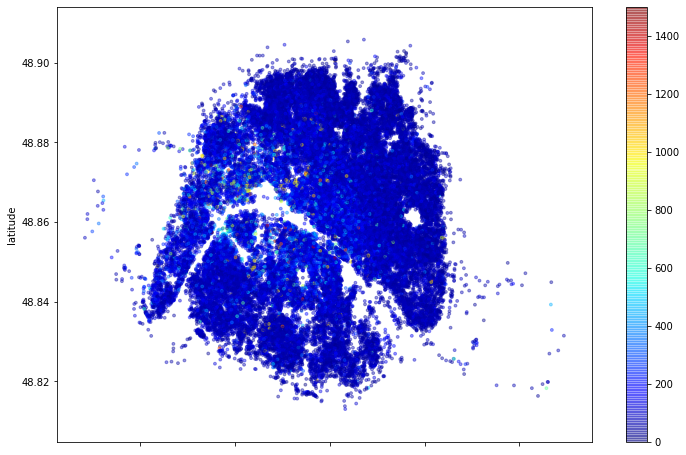

In [21]:
# Plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**
---
O presente estudo foi  realizado de forma superficial, a partir de análises simples tendo como base informações retiradas da base de dados do Airbnb. 

Apesar  dos outliers encontrados, foi possível extrair diversas informações essenciais para quem deseja se hospedar em Paris, como faixa  de  preços, quantidade de imóveis disponíveis e seus tipos, no entanto, é relevante dizer que esta dataset é uma versão resumida, ideal apenas para uma abordagem inicial.

Recomenda-se que seja usado, em uma próxima análise aprodundada, o conjunto de dados completos, com 106 atributos disponíveis na  plataforma  do  Airbnb. Permitindo assim  uma  maior possibilidade de cruzamentos de dados, ajudando a identificar outras parâmetros importantes.



## **REFERÊNCIAS**

*AIRBNB:* Inside Airbnb. Disponível em <Inside Airbnb ( http://insideairbnb.com/get-the-data.html )>  a partir do segunte arquivo: listings.csv - Summary information and metrics for listings in Paris (good for visualisations).

